# Cloning the repository

## Generating a new SSH key 

There is a need to add the code generated in the last cell in the github account to work (settings -> SSH and GPG Keys -> New SSH key)

In [ ]:
!ssh-keygen -t rsa -b 4096

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

In [ ]:
!cat /root/.ssh/id_rsa.pub

## Cloning and entering the repository folder

In [4]:
!git clone git@github.com:robert-abc/helsinki.git --branch main

Cloning into 'helsinki'...
remote: Enumerating objects: 373, done.
remote: Counting objects: 100% (373/373), done.
remote: Compressing objects: 100% (330/330), done.
remote: Total 373 (delta 178), reused 111 (delta 28), pack-reused 0
Receiving objects: 100% (373/373), 67.09 MiB | 10.12 MiB/s, done.
Resolving deltas: 100% (178/178), done.


In [5]:
%cd helsinki

/content/helsinki


# Generating results

In [15]:
!python main.py examples/19/input examples/19/output 19 --num_iter 2400 --dl_param 1e-3 1e-3 7.5e-4 7.5e-4 5e-4 5e-4 1e-4

2 images were found.
2021-09-30 17:56:13.243521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 17:56:13.250313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 17:56:13.250899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 17:56:13.251818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 17:56:13.252410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful 

# Results visualization
This is an example from the blur step 19 (found in the folder Examples/19)

In [16]:
from utils import process
import os
import re
import matplotlib.pyplot as plt

In [18]:
gt_name=os.listdir('examples/19/groundTruth')
in_name=os.listdir('examples/19/input')
out_name=os.listdir('examples/19/output')

r=re.compile(".*tif|.*png")

gt_name=list(filter(r.match,gt_name))
in_name=list(filter(r.match,in_name))
out_name=list(filter(r.match,out_name))

gt_name.sort()
in_name.sort()
out_name.sort()

In [20]:
img_list=[]

for i in range(len(gt_name)):
  ground,_,_=process.load_img(os.path.join('examples/19/groundTruth',gt_name[i]),width=512,enforse_div32='EXTEND')
  input,_,_=process.load_img(os.path.join('examples/19/input',in_name[i]),width=512,enforse_div32='EXTEND')
  output,_,_=process.load_img(os.path.join('examples/19/output',out_name[i]),width=512,enforse_div32='EXTEND')

  img_list.append([ground,input,output])

In [21]:
def multiplot(imgs,titles=['Ground Truth','Input','Output']):
  plt.figure(figsize=[16,8])
  for i in range(len(imgs)):
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i][0],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show();

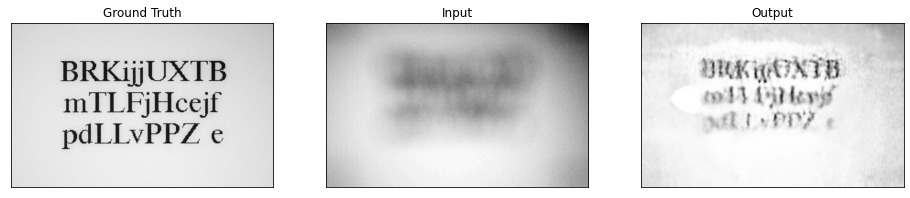

In [22]:
# Times New Roman
multiplot(img_list[0])

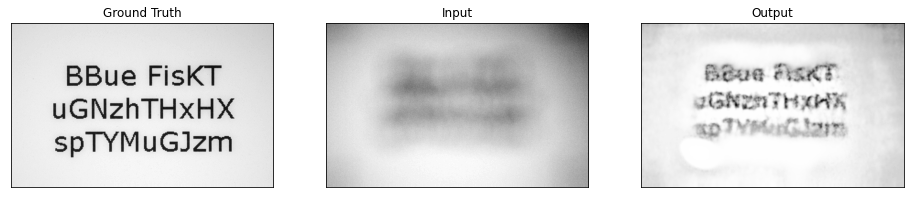

In [23]:
# Verdana
multiplot(img_list[1])